In [1]:
from afmario import BoruvkasAlgorithmSingleMachine, Graph, BoruvkasAlgorithm
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

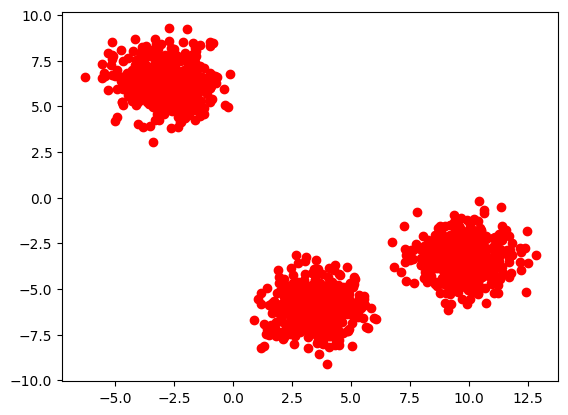

In [2]:
import math

n_samples = 1500
V, y = make_blobs(n_samples = n_samples, centers = 3, n_features = 2, random_state = 56)

points = V

def generate_graph(points):
    G = Graph()
    G.points = points

    # add a vertex for each point (map vertex id to xy data from points list)
    for i in range(len(points)):
        G.add_vertex(i)

    # add an edge for each possible point
    for i in G.V:
        for j in G.V:
            if i == j:
                continue

            (x1, y1) = G.points[i]
            (x2, y2) = G.points[j]

            w = math.ceil(math.sqrt((x1 - x2)**2 + (y1 - y2)**2))
            G.add_edge(i, j, w)

    return G

Gblobs1 = generate_graph(points)

def generate_plot_for_graph(G):

    plt.figure()

    xs, ys = [], []
    for x in G.V.keys():
        xs.append(G.points[x][0])
        ys.append(G.points[x][1])

    plt.scatter(xs, ys, c='r')

generate_plot_for_graph(Gblobs1)

In [3]:
max_iterations = 10
alg = BoruvkasAlgorithm(Gblobs1, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
round 1
neighborhoods: ['(1465, {0, 518, 777, 781, 527, 534, 281, 282, 793, 794, 795, 796, 1050, 1060, 811, 300, 301, 307, 1334, 573, 830, 320, 837, 1350, 582, 75, 1103, 856, 91, 348, 859, 1118, 865, 1380, 1125, 617, 619, 113, 114, 375, 1402, 894, 129, 900, 390, 648, 1417, 1165, 1425, 401, 1173, 922, 1438, 928, 165, 933, 180, 1461, 1208, 1465, 698, 444, 701, 448, 201, 714, 459, 1484, 972, 1228, 463, 719, 723, 212, 980, 989, 1249, 1252, 998, 231, 491, 238, 239, 1009}) ', '(1489, {1, 1025, 1029, 9, 1033, 1035, 1037, 14, 15, 16, 1039, 1041, 19, 21, 1045, 1046, 26, 1052, 1053, 32, 1058, 1063, 1067, 46, 1076, 1077, 57, 59, 60, 61, 62, 63, 1083, 1086, 66, 67, 1088, 1089, 70, 1093, 1098, 1100, 77, 1101, 1105, 82, 1106, 84, 1107, 86, 1108, 1110, 1113, 1116, 94, 1119, 96, 99, 102, 1129, 108, 109, 1132, 1134, 1140, 1148, 1150, 127, 128, 1154, 1157, 134, 136, 1160, 1161, 140, 1166, 144, 145, 1169, 1170, 149, 152, 155, 1184, 1185, 1186, 163, 1

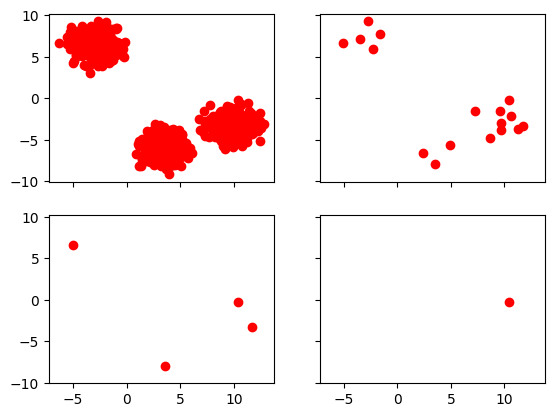

In [5]:
def plot_graph(V, E, points, ax):
    xs, ys = [], []
    for x in V.keys():
        xs.append(points[x][0])
        ys.append(points[x][1])

    # print(xs, ys)
    ax.scatter(xs, ys, c='r')

n = len(Vs)
fig, axarr = plt.subplots(2, 2, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 2)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points, ax)
